# 金融 证券 图谱搭建

本项目为基于 Python 中金融数据包 `TUSHARE` ，搭建一个金融证券知识图谱。

项目以 jupyter notebook 的形式开源，方便感兴趣的朋友一步步复现。
整个项目结构如下：

![](../pictures/structures.png)

## 数据获取

数据来源：TUSHARE

网站：https://tushare.pro/document/2

从 `TUSHARE` 的接口文档，对数据进行筛选。找出关联数据，这里我先选择以下**6**类数据。
- 股票列表
- 上市公司基本信息
- 上市公司管理层
- 公募基金列表
- 公募基金公司
- 公募基金持仓数据



In [2]:
# !pip install -r ../requirements.txt

In [3]:
import tushare as ts
import pandas as pd

from datetime import timedelta,datetime
import time

In [36]:
# 若 token 失效，可在公众号 `知行并重` 后台回复 `tushare` 获得最新 token
ts.set_token('b6113c6733fb23cc9ee1249f5a61b0c0df033b1280d97cb770378df5')
pro = ts.pro_api()

In [4]:
data_path = '../data/'

### 获取上市公司名录

链接：https://tushare.pro/document/2?doc_id=25

|名称|类型|描述|
|--|--|--|
|ts_code|str|TS代码|
|symbol|str|<font  color=#009688  >**股票代码**</font>|
|name|str|<font  color=#009688  >**股票名称**</font>|
|area|str|所在地域|
|industry|str|<font  color=#009688  >**所属行业**</font>|
|fullname|str|股票全称|
|enname|str|英文全称|
|market|str|市场类型 （主板/中小板/创业板/科创板）|
|exchange|str|交易所代码|
|curr_type|str|交易货币|
|list_status|str|上市状态： L上市 D退市 P暂停上市|
|list_date|str|上市日期|
|delist_date|str|退市日期|
|is_hs|str|是否沪深港通标的，N否 H沪股通 S深股通|

In [4]:
columns = 'ts_code,symbol,name,area,industry,fullname,enname,market,exchange,curr_type,list_status,list_date,delist_date,is_hs'

total_stocks = pro.stock_basic(fields = columns)
# total_stocks = pro.query('stock_basic', exchange='', list_status='L', fields= columns)

total_stocks.shape

(3767, 14)

In [42]:
total_stocks.exchange.value_counts()

SZSE    2186
SSE     1560
Name: exchange, dtype: int64

In [49]:
# 保存数据
total_stocks.to_csv(data_path + 'company_lsit_all.csv')

In [5]:
total_stocks = pd.read_csv(data_path + 'company_lsit_all.csv')

In [20]:
total_stocks.market.value_counts()

主板     1951
中小板     940
创业板     787
科创板      68
Name: market, dtype: int64

### 上市公司基本信息

这部分数据与上面的上市公司名录互补，提取所在省份和城市。

|名称|类型|默认显示|描述|
|---|---|---|---|
|ts_code|str|Y| <font  color=#009688  >**股票代码**</font>|
|exchange|str|Y| 交易所代码 ，SSE上交所 SZSE深交所|
|chairman|str|Y| 法人代表|
|manager |str|Y| 总经理|
|secretary| str|Y| 董秘|
|reg_capital |float| Y| 注册资本|
|setup_date|str|Y| 注册日期|
|province|str|Y| <font  color=#009688  >**所在省份**</font>|
|city|str|Y|  <font  color=#009688  >**所在城市**</font>|
|introduction|str|N| 公司介绍|
|website |str|Y| 公司主页|
|email| str|Y| 电子邮件|
|office|str|N| 办公室|
|employees| int|Y| 员工人数|
|main_business| str|N| 主要业务及产品|
|business_scope|str|N| 经营范围|

In [17]:
df_szse =  pro.stock_company(exchange = "SZSE")
df_sse =  pro.stock_company(exchange = "SSE")

# 合并 深交所 和 上交所 股票
df_company_detail = pd.concat([df_szse,df_sse])

In [20]:
df_szse.shape,df_sse.shape,df_company_detail.shape

((2262, 12), (1627, 12), (3889, 12))

In [23]:
# 保存数据
df_company_detail.to_csv('./stock_graph/company_detail_all.csv',index=False)

In [18]:
df_company_detail = pd.read_csv('./stock_graph/company_detail_all.csv')

In [21]:
df_company_detail.head().T

,0,1,2,3,4
ts_code,300363.SZ,002790.SZ,300493.SZ,002716.SZ,300587.SZ
exchange,SZSE,SZSE,SZSE,SZSE,SZSE
chairman,居年丰,罗远良,郎晓刚,曹永贵,许吉锭
manager,居年丰,张剑波,葛琼,曹永贵,许孔斌
secretary,陶荣,陈雪峰,庞军,许子军,范薇薇
reg_capital,54274.8,40960,47706.9,96047.8,18171.3
setup_date,20050707,19990419,20001009,20041108,20031226
province,重庆,福建,上海,湖南,浙江
city,重庆市,厦门市,上海市,郴州市,台州市
website,www.porton.cn,www.rtplumbing.com,www.fortune-co.com,www.jingui-silver.com,www.tiantie.cn


In [43]:
share_list = set(df_company_detail.ts_code.tolist())

### 上市公司管理层

|名称|类型|默认显示|描述|
|----|----|---|--|
|ts_code| str|Y| <font  color=#009688  >**TS股票代码**</font>|
|ann_date|str|Y| 公告日期|
|name|str|Y| <font  color=#009688  >**姓名**</font>|
|gender|str|Y| 性别|
|lev|str|Y| 岗位类别|
|title| str|Y| 岗位|
|edu|str|Y| 学历|
|national|str|Y| 国籍|
|birthday|str|Y| 出生年月|
|begin_date|str|Y| 上任日期|
|end_date|str|Y| 离任日期|
|resume|str|N| 个人简历|

用户需要2000积分才可以调取

In [15]:
def get_data(share_list,func,data_path='./stock_graph/',filename='temp.csv'):
    for i,comp in enumerate(share_list):
        df = func(ts_code=comp)
        if i == 0:
            df.to_csv(data_path + filename,index=False, mode='a')
        else:    
            df.to_csv(data_path + filename,index=False, mode='a', header=None)

        if i % 50 ==0: 
            print(comp,'_num_:',i)

        # 抱歉，您每分钟最多访问该接口80次
        time.sleep(1)

In [19]:
share_list = list(set(df_company_detail['ts_code']))

In [16]:
get_data(share_list,func = pro.stk_managers ,data_path = data_path ,filename=f'stk_managers.csv')

002024.SZ _num_: 0
300094.SZ _num_: 50
300619.SZ _num_: 100
000622.SZ _num_: 150
600650.SH _num_: 200
688030.SH _num_: 250
002387.SZ _num_: 300
603912.SH _num_: 350
600489.SH _num_: 400
600061.SH _num_: 450
002311.SZ _num_: 500
600875.SH _num_: 550
002957.SZ _num_: 600
603637.SH _num_: 650
600733.SH _num_: 700
600877.SH _num_: 750
000613.SZ _num_: 800
600418.SH _num_: 850
001965.SZ _num_: 900
688188.SH _num_: 950
603985.SH _num_: 1000
002370.SZ _num_: 1050
000673.SZ _num_: 1100
002901.SZ _num_: 1150
002232.SZ _num_: 1200
688310.SH _num_: 1250
300656.SZ _num_: 1300
600009.SH _num_: 1350
300749.SZ _num_: 1400
600547.SH _num_: 1450
600022.SH _num_: 1500
002029.SZ _num_: 1550
603959.SH _num_: 1600
002768.SZ _num_: 1650
600051.SH _num_: 1700
002244.SZ _num_: 1750
300483.SZ _num_: 1800
000008.SZ _num_: 1850
000627.SZ _num_: 1900
002008.SZ _num_: 1950
688101.SH _num_: 2000
300430.SZ _num_: 2050
000597.SZ _num_: 2100
603499.SH _num_: 2150
600210.SH _num_: 2200
603115.SH _num_: 2250
603900.SH _

### 公募基金列表

https://tushare.pro/document/2?doc_id=19

|名称|类型|默认显示|描述|
|--|--|--|--|
|ts_code|str|Y|<font  color=#009688  >**基金代码**</font>|
|name|str|Y|简称|
|management|str|Y|<font  color=#009688  >**管理人**</font>|
|custodian|str|Y|<font  color=#009688  >**托管人**</font>|
|fund_type|str|Y|投资类型|
|found_date|str|Y|成立日期|
|due_date|str|Y|到期日期|
|list_date|str|Y|上市时间|
|issue_date|str|Y|发行日期|
|delist_date|str|Y|退市日期|
|issue_amount|float|Y|发行份额(亿)|
|m_fee|float|Y|管理费|
|c_fee|float|Y|托管费|
|duration_year|float|Y|存续期|
|p_value|float|Y|面值|
|min_amount|float|Y|起点金额(万元)|
|exp_return|float|Y|预期收益率|
|benchmark|str|Y|业绩比较基准|
|status|str|Y|存续状态D摘牌 I发行 L已上市|
|invest_type|str|Y|投资风格|
|type|str|Y|基金类型|
|trustee|str|Y|受托人|
|purc_startdate|str|Y|日常申购起始日|
|redm_startdate|str|Y|日常赎回起始日|
|market|str|Y|E场内O场外|

描述：获取公募基金数据列表，包括场内和场外基金
积分：用户需要1500积分才可以调取

In [119]:
df_e = pro.fund_basic(market='E')   # 交易市场: E场内 O场外（默认E）
df_o = pro.fund_basic(market='O')   # 交易市场: E场内 O场外（默认E）

df_all = pd.concat([df_e,df_o])

df_all.to_csv('./stock_graph/fund_basic.csv',index=False)

In [127]:
df_all.shape

(10859, 25)

In [128]:
df_all.head()

,ts_code,name,management,custodian,fund_type,found_date,due_date,list_date,issue_date,delist_date,...,min_amount,exp_return,benchmark,status,invest_type,type,trustee,purc_startdate,redm_startdate,market
0,515070.SH,AI智能,华夏基金,中国银行,股票型,20191209,None,20191224,20191121,None,...,0.1000,None,中证人工智能主题指数收益率,L,被动指数型,契约型开放式,None,20191224,20191224,E
1,515330.SH,天弘300,天弘基金,招商证券,股票型,20191205,None,20191226,20191104,None,...,0.1000,None,沪深300指数收益率,L,被动指数型,契约型开放式,None,20191226,20191226,E
2,515310.SH,添富300,汇添富基金,招商银行,股票型,20191204,None,20191225,20190927,None,...,0.1000,None,沪深300指数收益率,L,被动指数型,契约型开放式,None,20191225,20191225,E
3,501089.SH,消费增强,方正富邦基金,中国民生银行,股票型,20191129,None,20191231,20191008,None,...,0.0001,None,中证主要消费红利指数收益率*95%+人民币银行活期存款收益率(税后)*5%,I,增强指数型,契约型开放式,None,20191231,20191231,E
4,515080.SH,N中证红利,招商基金,浦发银行,股票型,20191128,None,20191227,20191021,None,...,0.1000,None,中证红利指数收益率,L,被动指数型,契约型开放式,None,20191227,20191227,E


### 公募基金公司


描述：获取公募基金管理人列表

积分：用户需要1500积分才可以调取，一次可以提取全部数据。

|名称|类型|默认显示|描述|
|--|--|--|--|
|name|str|Y|<font  color=#009688  >**基金公司名称**</font>|
|shortname|str|Y|简称|
|short_enname|str|N|英文缩写|
|province|str|Y|省份|
|city|str|Y|城市|
|address|str|Y|注册地址|
|phone|str|Y|电话|
|office|str|Y|办公地址|
|website|str|Y|公司网址|
|chairman|str|Y|法人代表|
|manager|str|Y|总经理|
|reg_capital|float|Y|注册资本|
|setup_date|str|Y|成立日期|
|end_date|str|Y|公司终止日期|
|employees|float|Y|员工总数|
|main_business|str|Y|主要产品及业务|
|org_code|str|Y|组织机构代码|
|credit_code|str|Y|统一社会信用代码|

In [124]:
df = pro.fund_company()

df.to_csv('./stock_graph/fund_company.csv', index=False)

In [125]:
df.head().T

,0,1,2,3,4
name,北京广能投资基金管理有限公司,宏源证券股份有限公司,国元证券股份有限公司,广发证券股份有限公司,长江证券股份有限公司
shortname,广能基金,宏源证券,国元证券,广发证券,长江证券
province,北京,新疆,安徽,广东,湖北
city,北京市,乌鲁木齐市,合肥市,广州市,武汉市
address,北京市朝阳区北四环中路27号院5号楼2712-2715A,新疆维吾尔自治区乌鲁木齐市文艺路233号宏源大厦,安徽省合肥市梅山路18号,广东省广州市黄埔区中新广州知识城腾飞一街2号618室,湖北省武汉市江汉区新华路特8号
phone,None,86-991-2301870,"86-551-62207323,86-551-62207968","86-20-87555888,86-20-87550565,86-20-87550265","86-27-65799866,86-27-65799856"
office,北京市朝阳区北四环中路27号院5号楼2712-2715A,新疆维吾尔自治区乌鲁木齐市文艺路233号宏源大厦,安徽省合肥市梅山路18号,"广东省广州市天河区天河北路183-187号大都会广场40楼5楼,7楼,8楼,18楼,19楼,...",湖北省武汉市江汉区新华路特8号
website,www.gnfund.cn,www.hysec.com,www.gyzq.com.cn,www.gf.com.cn,www.cjsc.com
chairman,刘锡潜,冯戎,蔡咏,孙树明,尤习贵
manager,杨运成,冯戎,俞仕新,林治海,刘元瑞


### 关系——公募基金持仓数据

获取公募基金持仓数据，**季度**更新
积分：用户需要至少1000积分才可以调取，

https://tushare.pro/document/2?doc_id=121

|名称|类型|默认显示|描述|
|--|--|--|--|
|ts_code| str| Y| <font  color=#009688  >**TS基金代码**</font>|
|ann_date|str |Y| 公告日期|
|end_date|str |Y| 截止日期|
|symbol|str| Y|  <font  color=#009688  >**股票代码**</font>|
|mkv |float| Y| 持有股票市值(元)|
|amount|float| Y| 持有股票数量（股）|
|stk_mkv_ratio| float| Y| 占股票市值比|
|stk_float_ratio| float| Y| 占流通股本比例|

In [129]:
fund_list = list(set(df_all.ts_code))

In [130]:
len(fund_list)

10859

In [135]:
fund_list[:5]

['150242.SZ', '002873.OF', '540001.OF', '007371.OF', '161729.OF']

In [136]:
get_data(fund_list,func = pro.fund_portfolio ,data_path = data_path ,filename=f'fund_portfolio.csv')

000227.OF _num_: 0
164509.SZ _num_: 50
519971.OF _num_: 100
001455.OF _num_: 150
005191.OF _num_: 200
501030.SH _num_: 250
519022.OF _num_: 300
510100.SH _num_: 350
005388.OF _num_: 400
582003.OF _num_: 450
519702.OF _num_: 500
006218.OF _num_: 550
004436.OF _num_: 600
000085.OF _num_: 650
502036.SH _num_: 700
007851.OF _num_: 750
519611.OF _num_: 800
003957.OF _num_: 850
519773.OF _num_: 900
162416.SZ _num_: 950
006522.OF _num_: 1000
001105.OF _num_: 1050
150218.SZ _num_: 1100
001445.OF _num_: 1150
002436.OF _num_: 1200
310368.OF _num_: 1250
150081.SZ _num_: 1300
007445.OF _num_: 1350
006624.OF _num_: 1400
006505.OF _num_: 1450
001788.OF _num_: 1500
002736.OF _num_: 1550
000110.OF _num_: 1600
004741.OF _num_: 1650
150017.SZ _num_: 1700
005833.OF _num_: 1750
002039.OF _num_: 1800
001893.OF _num_: 1850
005447.OF _num_: 1900
003228.OF _num_: 1950
184722.SZ _num_: 2000
161620.OF _num_: 2050
006573.OF _num_: 2100
002727.OF _num_: 2150
582201.OF _num_: 2200
007449.OF _num_: 2250
001939.OF _

## 构建数据模型 


通过对获取的数据进行梳理，明确内部之间的关联关系，确定节点和关系

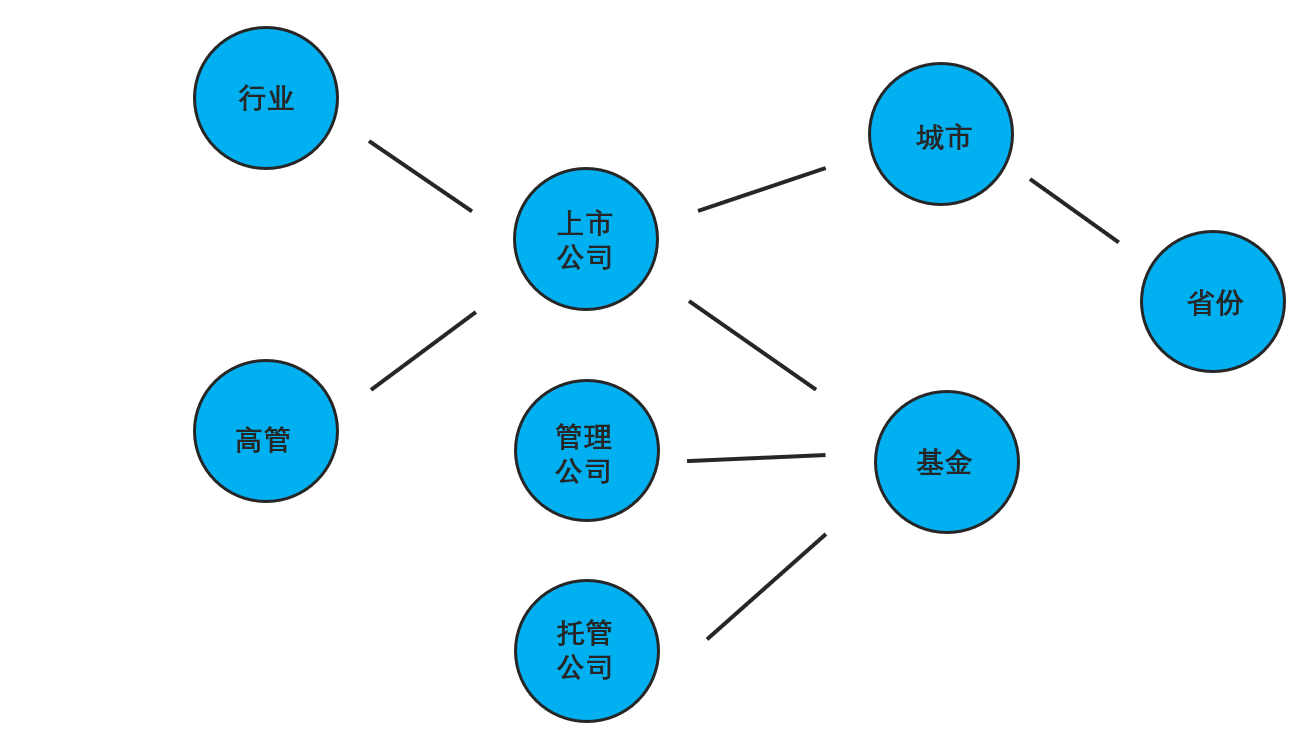

实体(节点)方面
1. 省份
2. 城市
3. 公司(上市公司 \ 基金管理公司 \ 基金托管公司)
4. 人（上市公司管理层）
5. 基金
6. 行业

关系方面
1. 城市 - [IN_PROVINCE] - > 省份 
2. 公司(上市公司\基金管理公司\ 基金托管公司) - [IN_CITY] - > 城市
4. 公司(上市公司) - [HAS_MANGER] - > 人（上市公司管理层）  [6类]
5. 公司(上市公司) - [IN_INDUSTRY] - > 行业
6. 基金  - [HAS_MANAGEMNET] - > 公司(基金管理公司)
6. 基金  - [HAS_CUSTODIAN] - > 公司(基金托管公司)
7. 基金  - [IN_PORTFOLIO] ->  公司(上市公司)

初步确定数据模型如下。

![shuju](../pictures/screenshot_2.png)